# Task 2: Perform Exploratory Data Analysis on dataset Indian Premier League

# NAME : ANISH JAYAKUMAR

![title](ipl_image.jpg)

In [1]:
#importing the packages
import numpy as np
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from bubbly.bubbly import bubbleplot 


In [2]:
#importing the dataset
data= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\GRIP INTERNSHIP\\matches.csv")
data.head(5)

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [3]:
data.shape

(756, 18)

In [4]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
data=data.drop('umpire3',axis=1)

In [7]:
data= data.drop('id', axis=1)

In [8]:
data=data.dropna(axis=0)

In [9]:
#Number of teams played in the history of IPL
print(len(data.team1.unique()),data.team1.unique())

15 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [10]:
#NUMBER OF GAMES WON BY THE TEAMS
winner= data["winner"].value_counts().reset_index()
winner.columns=("teams", "counts")
winner

teams  counts
0                Mumbai Indians     109
1           Chennai Super Kings      98
2         Kolkata Knight Riders      92
3   Royal Challengers Bangalore      82
4               Kings XI Punjab      81
5              Rajasthan Royals      75
6              Delhi Daredevils      66
7           Sunrisers Hyderabad      56
8               Deccan Chargers      29
9                 Gujarat Lions      13
10                Pune Warriors      12
11       Rising Pune Supergiant      10
12               Delhi Capitals       9
13         Kochi Tuskers Kerala       6
14      Rising Pune Supergiants       5

In [11]:
winner_bar = px.bar(winner,y='teams',x='counts',
             orientation='h',color='teams',
            labels={'teams':'NAME OF THE TEAM','counts':'GAMES WON BY THE TEAMS'})
winner_bar.show()

In [12]:
#PLAYERS WHO RECIEVED MAXIMUM NUMBER OF PLAYER OF MATCH AWARDS
pom= data["player_of_match"].value_counts().reset_index()
pom.columns=("players", "counts")
pom= pom[pom["counts"]>10]
pom

players  counts
0         CH Gayle      21
1   AB de Villiers      20
2        RG Sharma      17
3        DA Warner      17
4         MS Dhoni      17
5        YK Pathan      16
6        SR Watson      15
7         SK Raina      14
8        G Gambhir      13
9       MEK Hussey      12
10       AM Rahane      12
11         V Kohli      12
12      AD Russell      11
13        V Sehwag      11
14        DR Smith      11
15        A Mishra      11

In [13]:
winner_bar = px.bar(pom,y='players',x='counts',
             orientation='h',color='players',
            labels={'players':'NAME OF THE PLAYER','counts':'PLAYER OF THE MATCH COUNTS'})
winner_bar.show()


In [14]:
#PROPORTIONS OF ELECTING BATTING AND FIELDING AFTER WINNING THE TOSS
decision= data["toss_decision"].value_counts().reset_index()
decision.columns=("decision", "counts")
decision

decision  counts
0    field     455
1      bat     288

In [53]:
px.pie(data_frame=decision, names= decision["decision"], values=decision["counts"],
      labels={"field":"FIELD", "bat":"BAT"}, title= "PORPORTIONS OF THE TOSS DECISION", hole= 0.435)

In [16]:
winbyruns= data[data["win_by_runs"]>60]
winbyrunss= winbyruns["winner"].value_counts().reset_index()
winbyrunss.columns=("teams", "counts")
winbyrunss

teams  counts
0          Chennai Super Kings      11
1               Mumbai Indians       7
2  Royal Challengers Bangalore       7
3             Rajasthan Royals       5
4              Kings XI Punjab       4
5        Kolkata Knight Riders       3
6             Delhi Daredevils       2
7          Sunrisers Hyderabad       2
8       Rising Pune Supergiant       1
9              Deccan Chargers       1

In [17]:
winbywckt= data[data["win_by_wickets"]>7]
winbywckts= winbywckt["winner"].value_counts().reset_index()
winbywckts.columns=("teams", "counts")
winbywckts

teams  counts
0   Royal Challengers Bangalore      16
1         Kolkata Knight Riders      16
2                Mumbai Indians      13
3              Delhi Daredevils      13
4              Rajasthan Royals      11
5           Chennai Super Kings      11
6               Kings XI Punjab       8
7           Sunrisers Hyderabad       8
8          Kochi Tuskers Kerala       2
9               Deccan Chargers       2
10       Rising Pune Supergiant       1
11      Rising Pune Supergiants       1

# MUMBAI INDIANS ANALYSIS

![title](mi.jpg)

In [69]:
mi= data[data["winner"]=="Mumbai Indians"]
mi.head()

season       city        date                        team1  \
6     2017     Mumbai  2017-04-09        Kolkata Knight Riders   
9     2017     Mumbai  2017-04-12          Sunrisers Hyderabad   
11    2017  Bangalore  2017-04-14  Royal Challengers Bangalore   
15    2017     Mumbai  2017-04-16                Gujarat Lions   
21    2017     Indore  2017-04-20              Kings XI Punjab   

             team2     toss_winner toss_decision  result  dl_applied  \
6   Mumbai Indians  Mumbai Indians         field  normal           0   
9   Mumbai Indians  Mumbai Indians         field  normal           0   
11  Mumbai Indians  Mumbai Indians         field  normal           0   
15  Mumbai Indians  Mumbai Indians         field  normal           0   
21  Mumbai Indians  Mumbai Indians         field  normal           0   

            winner  win_by_runs  win_by_wickets player_of_match  \
6   Mumbai Indians            0               4          N Rana   
9   Mumbai Indians            0               4       JJ Bumrah   
11  Mumbai Indians            0               4      KA Pollard   
15  Mumbai Indians            0               6          N Rana   
21  Mumbai Indians            0               8      JC Buttler   

                     venue                umpire1        umpire2  
6         Wankhede Stadium            Nitin Menon      CK Nandan  
9         Wankhede Stadium            Nitin Menon      CK Nandan  
11   M Chinnaswamy Stadium  KN Ananthapadmanabhan   AK Chaudhary  
15        Wankhede Stadium         A Nand Kishore         S Ravi  
21  Holkar Cricket Stadium              M Erasmus  C Shamshuddin

In [20]:
mi_pom= mi["player_of_match"].value_counts().reset_index()
mi_pom=mi_pom[mi_pom["player_of_match"]>1]
mi_pom.columns=("players","counts")

px.bar(data_frame=mi_pom, x="players", y="counts", text= "players", 
       range_color="counts", barmode="relative"
      ,title= "MOST SUCCESSFUL PLAYERS OF MUMBAI INDIANS")


In [21]:
winbyruns= mi[mi["win_by_runs"]>50].value_counts().reset_index()

px.scatter(data_frame= winbyruns, x= "venue", y="win_by_runs", color="win_by_runs",
          animation_frame="season")

In [65]:
winbywckt= mi[mi["win_by_wickets"]>7].value_counts().reset_index()

In [70]:
venue= mi["venue"].value_counts().reset_index()
venue.columns=("venue", "counts")
venue.head(10)

venue  counts
0                            Wankhede Stadium      42
1                                Eden Gardens      10
2                       M Chinnaswamy Stadium       8
3                           Brabourne Stadium       6
4   Rajiv Gandhi International Stadium, Uppal       5
5                  Dr DY Patil Sports Academy       5
6  Punjab Cricket Association Stadium, Mohali       3
7                            Feroz Shah Kotla       3
8             MA Chidambaram Stadium, Chepauk       3
9                   M. A. Chidambaram Stadium       2

In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=3, cols=2,
     specs=[[{"type":"bar"},{"type":"bar"},],
            [None, None],
        [{"type":"scatter"},  {"type":"bar"}]])


fig.add_trace(go.Bar(x=mi_pom["players"], y=mi_pom["counts"]),
                    row=1, col=1,)
fig.add_trace(go.Bar(x=winbyruns["venue"], y=winbyruns["win_by_runs"]), 
                    row=1, col=2)
fig.add_trace(go.Scatter(x=venue["venue"], y=venue["counts"]),
                    row=3, col=1)
fig.add_trace(go.Bar(x=winbywckt["venue"], y=winbywckt["win_by_wickets"]),
                    row=3, col=2)

# Update xaxis properties
fig.update_xaxes(row=1, col=1)
fig.update_xaxes(row=1, col=2)
fig.update_xaxes(title_text="VENUES", row=3, col=1)
fig.update_xaxes(title_text="VENUES" , row=3, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="PLAYER OF MATCH", row=1, col=1)
fig.update_yaxes(title_text="WIN BY RUNS", row=1, col=2)
fig.update_yaxes(title_text="NUMBER OF WINS",row=3, col=1)
fig.update_yaxes(title_text="WIN BY WICKETS", row=3, col=2)




fig.update_layout(height=1000, width=1000,
                   title_text="MUMBAI INDIANS ANALYSIS")
fig.show()

# CHENNAI SUPER KINGS ANALYSIS

![title](csk.jpg)

In [68]:
csk= data[data["winner"]=="Chennai Super Kings"]
csk.head()

season        city        date                  team1  \
60    2008  Chandigarh  2008-04-19    Chennai Super Kings   
66    2008     Chennai  2008-04-23    Chennai Super Kings   
70    2008     Chennai  2008-04-26  Kolkata Knight Riders   
73    2008   Bangalore  2008-04-28    Chennai Super Kings   
86    2008       Delhi  2008-05-08       Delhi Daredevils   

                          team2            toss_winner toss_decision  result  \
60              Kings XI Punjab    Chennai Super Kings           bat  normal   
66               Mumbai Indians         Mumbai Indians         field  normal   
70          Chennai Super Kings  Kolkata Knight Riders           bat  normal   
73  Royal Challengers Bangalore    Chennai Super Kings           bat  normal   
86          Chennai Super Kings    Chennai Super Kings         field  normal   

    dl_applied               winner  win_by_runs  win_by_wickets  \
60           0  Chennai Super Kings           33               0   
66           0  Chennai Super Kings            6               0   
70           0  Chennai Super Kings            0               9   
73           0  Chennai Super Kings           13               0   
86           0  Chennai Super Kings            0               4   

   player_of_match                                       venue      umpire1  \
60      MEK Hussey  Punjab Cricket Association Stadium, Mohali    MR Benson   
66       ML Hayden             MA Chidambaram Stadium, Chepauk    DJ Harper   
70        JDP Oram             MA Chidambaram Stadium, Chepauk    BF Bowden   
73        MS Dhoni                       M Chinnaswamy Stadium  BR Doctrove   
86        MS Dhoni                            Feroz Shah Kotla    Aleem Dar   

           umpire2  
60      SL Shastri  
66  GA Pratapkumar  
70  AV Jayaprakash  
73       RB Tiffin  
86       RB Tiffin

In [64]:
csk_pom= csk["player_of_match"].value_counts().reset_index()
csk_pom=csk_pom[csk_pom["player_of_match"]>1]
csk_pom.columns=("players","counts")

px.bar(data_frame=csk_pom, x="players", y="counts", text= "players", range_color="counts", barmode="relative"
      ,title= "MOST SUCCESSFUL PLAYERS OF CHENNAI SUPER KINGS")


In [54]:
winbyruns1= csk[csk["win_by_runs"]>50].value_counts().reset_index()

In [58]:
winbywckt1= csk[csk["win_by_wickets"]>7].value_counts().reset_index()

In [59]:
venue1= csk["venue"].value_counts().reset_index()
venue1.columns=("venue", "counts")

In [50]:
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type":"bar"},{"type":"bar"},],
            [None, None],
        [{"type":"scatter"},  {"type":"bar"}]])

fig.add_trace(go.Bar(x=csk_pom["players"], y=csk_pom["counts"]),
                    row=1, col=1,)
fig.add_trace(go.Bar(x=winbyruns1["venue"], y=winbyruns1["win_by_runs"]), 
                    row=1, col=2)
fig.add_trace(go.Scatter(x=venue1["venue"], y=venue1["counts"]),
                    row=3, col=1)
fig.add_trace(go.Bar(x=winbywckt1["venue"], y=winbywckt1["win_by_wickets"]),
                    row=3, col=2)

# Update xaxis properties
fig.update_xaxes(row=1, col=1)
fig.update_xaxes(row=1, col=2)
fig.update_xaxes(title_text="VENUES", row=3, col=1)
fig.update_xaxes(title_text="VENUES" , row=3, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="PLAYER OF MATCH", row=1, col=1)
fig.update_yaxes(title_text="WIN BY RUNS", row=1, col=2)
fig.update_yaxes(title_text="NUMBER OF WINS",row=3, col=1)
fig.update_yaxes(title_text="WIN BY WICKETS", row=3, col=2)

fig.update_layout(height=1000, width=1000, title_text="CHENNAI SUPER KINGS ANALYSIS")
fig.show()

# Suggesting the players to companies for the endorsements

Most successful players can be suggested based on the number of "PLAYER_OF_MATCH" awards they have won.

Captains of the IPL title winning teams can be considered as the most successful players of all times.

CHRIS GAYLE

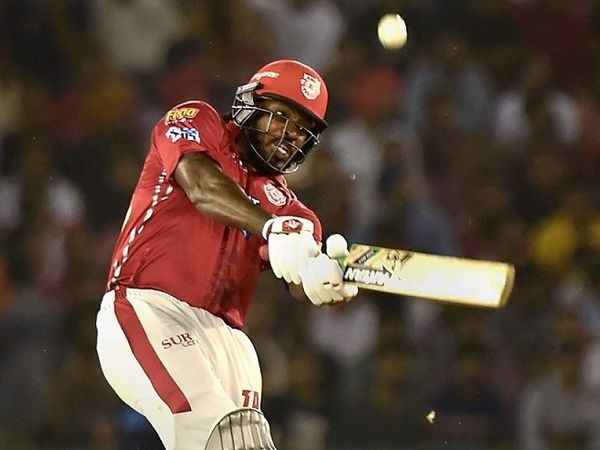

In [46]:
from IPython.display import Image
Image(filename= "cg.jpg", width=300, height=300)

AB DE VILLIERS

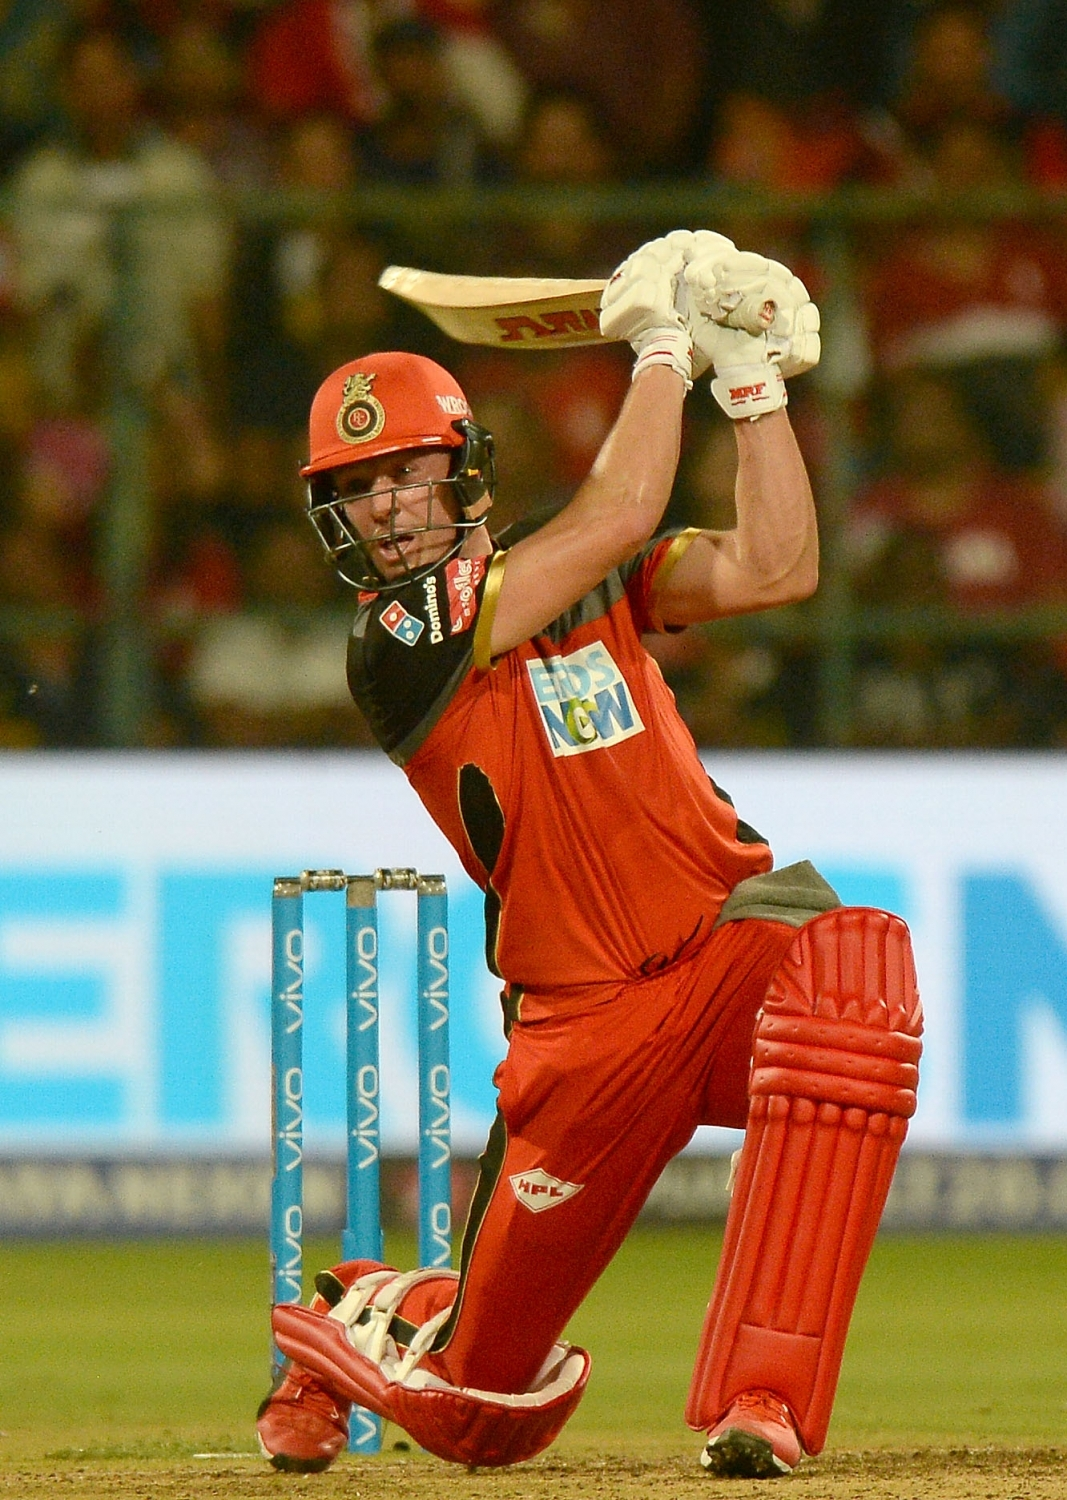

In [44]:
Image(filename= "abd.jpg", width=250, height=250)

DAVID WARNER

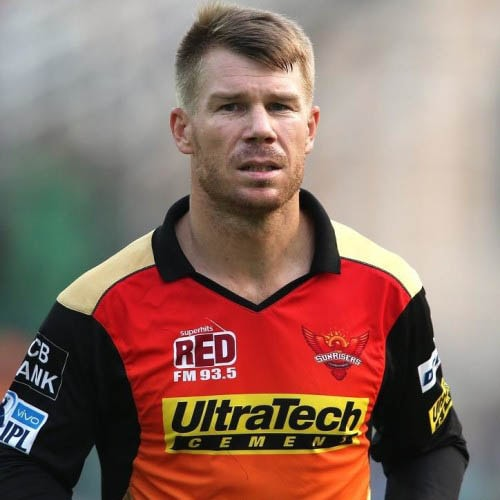

In [47]:
Image(filename= "dw.jpg", width=250, height=250)

ROHIT SHARMA

CAPTAIN OF MUMBAI INDIANS

IPL TITLE WINNER FOR THE YEAR- 2013,2015,2017,2019 and 2020

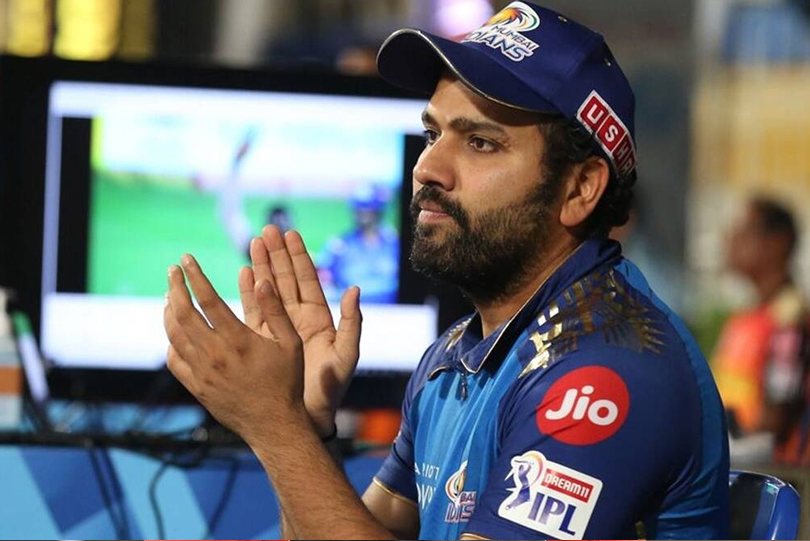

In [37]:
Image(filename= "rs.jpg", width=400, height=400)

MAHENDRA SINGH DHONI

CAPTAIN OF CHENNAI SUPER KINGS

IPL TITLE WINNER FOR THE YEAR- 2010, 2011 and 2018

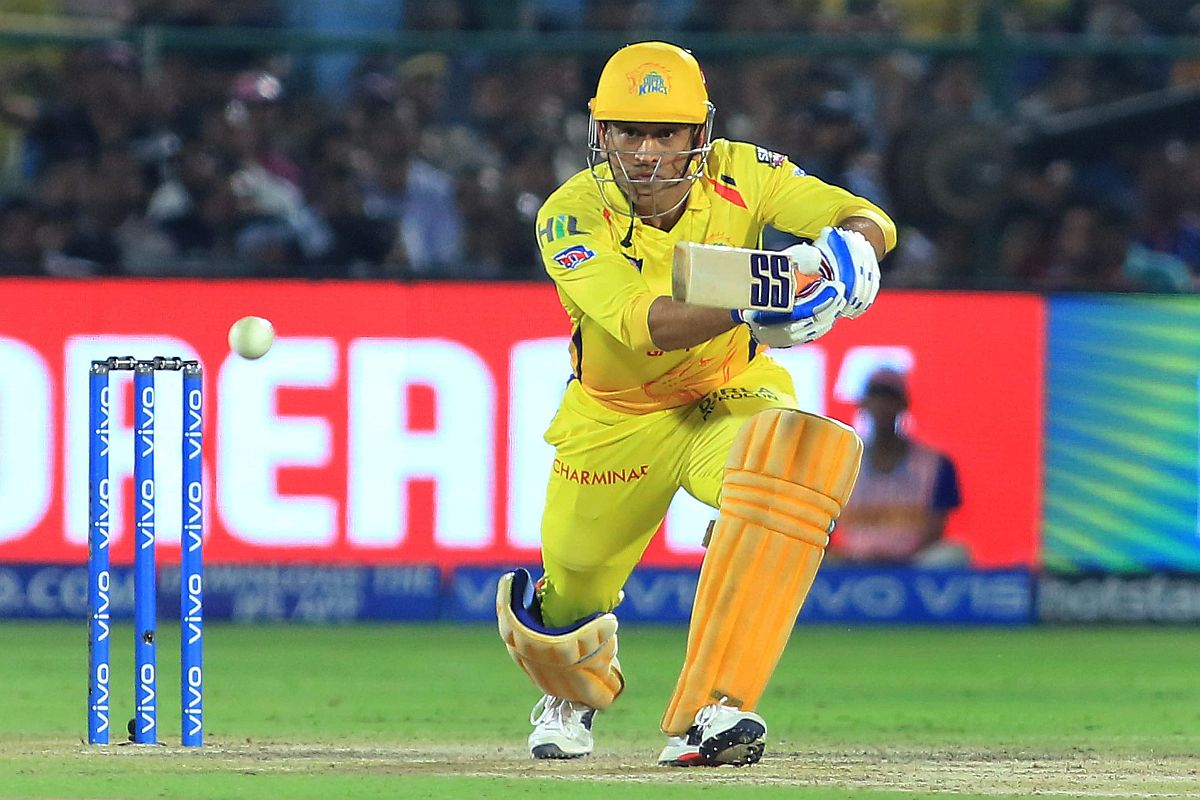

In [38]:
Image(filename= "msd.jpg", width=400, height=400)

GAUTHAM GAMBHIR

CAPTAIN OF KOLKATA KNIGHT RIDERS

IPL TITLE WINNER FOR THE YEAR- 2012 and 2014

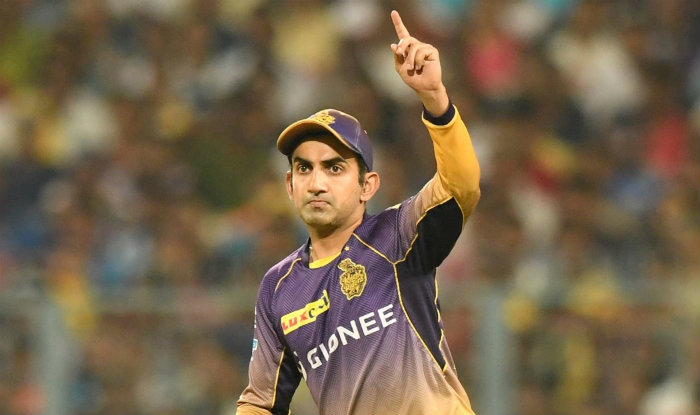

In [39]:
Image(filename= "gg.jpg", width=400, height=400)